Importamos las librerías que vamos a usar

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Pie chart

In [2]:
# Cargamos los datos
data = pd.read_csv("data/adult.csv")

# Función para simplificar la raza
def simplify_race(race):
    if race == 'White':
        s_race = 'Blanca'
    elif race == 'Black':
        s_race = 'Negra'
    else:
        s_race = 'Otra'
    return s_race

# Transformación de datos
data['raza'] = data['race'].map(simplify_race)
data = data.groupby('raza')['raza'].count()
results = data.to_numpy()
labels = data.index.tolist()

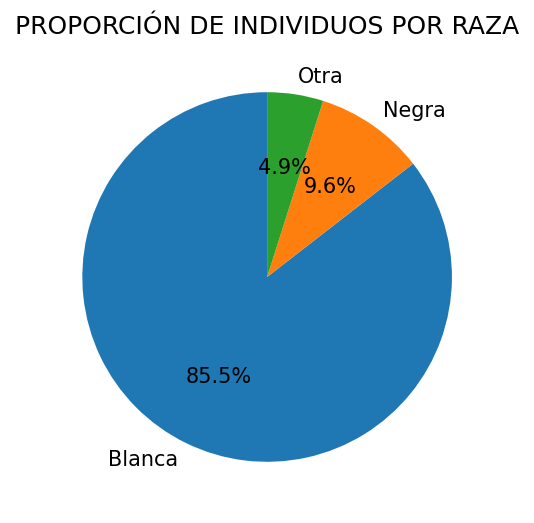

In [3]:
# Creamos Pie chart
fig, ax = plt.subplots(1, figsize=(8, 4), dpi=150)
plt.title('PROPORCIÓN DE INDIVIDUOS POR RAZA')
ax.pie(results, labels = labels, startangle = 90, autopct='%1.1f%%')
fig.patch.set_facecolor('white')
fig.savefig('images/Pie_chart.png', bbox_inches='tight')
plt.show()

# Matrix plot

In [4]:
# Cargamos los datos
data = pd.read_csv("data/911.csv", parse_dates=['timeStamp'], date_format='%Y-%m-%d %H:%M:%S')

# Generamos variables 'Día semana' y Hora
data['Día semana'] = data['timeStamp'].apply(lambda x: x.strftime('%w'))
dmap={'0':'7 Domingo', '1':'1 Lunes', '2':'2 Martes', '3':'3 Miércoles', '4':'4 Jueves', '5':'5 viernes', '6':'6 Sábado'}
data['Día semana']=data['Día semana'].map(dmap)
data['Hora'] = data['timeStamp'].apply(lambda x: x.strftime('%H'))
# Generamos dataset para heatmap
df=pd.pivot_table(data, values='e', index=['Día semana'] , columns=['Hora'], aggfunc=np.sum)

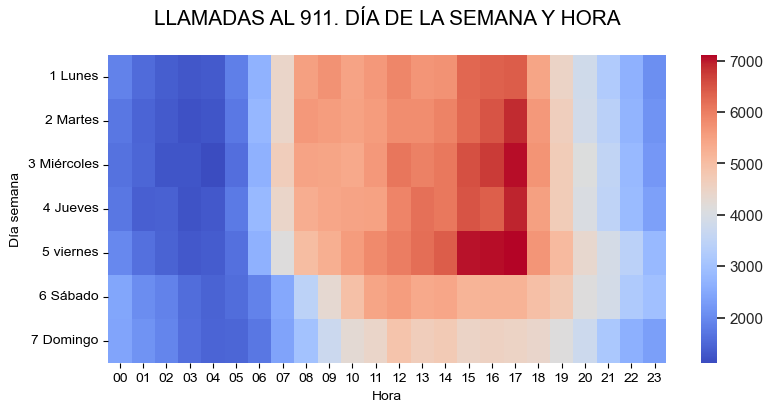

In [5]:
# Generamos heatmap
fig, ax = plt.subplots(1, figsize=(9, 4))
sns.set()
ax = sns.heatmap(df, cmap="coolwarm")
fig.patch.set_facecolor('white')
plt.title('LLAMADAS AL 911. DÍA DE LA SEMANA Y HORA\n', fontsize=15)
fig.savefig('images/Matrix_plot.png', bbox_inches='tight')
plt.show()

# Map tile grid

In [6]:
# Cargamos datos
data = pd.read_csv("data/1976-2020-president.csv")
states = pd.read_csv('data/us_tile_grid.csv')

# Función para simplificar el nombre de los candidatos
def simplify_name(name):
    if name == 'BIDEN, JOSEPH R. JR':
        s_name = 'BIDEN'
    elif name == 'TRUMP, DONALD J.':
        s_name = 'TRUMP'
    else:
        s_name = 'OTHER'
    return s_name

# Transformaciones
df = data[data['year'] == 2020]
df['cand_simp'] = df['candidate'].map(simplify_name)
df = df.loc[df.groupby('state')['candidatevotes'].idxmax()]
cols = ['state', 'state_po','cand_simp','party_detailed']
df = df[cols]
df = df[['state_po', 'cand_simp']].merge(states, how='inner', left_on='state_po', right_on='code')

C:\Users\Carlos\AppData\Local\Temp\ipykernel_31128\3815745610.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cand_simp'] = df['candidate'].map(simplify_name)


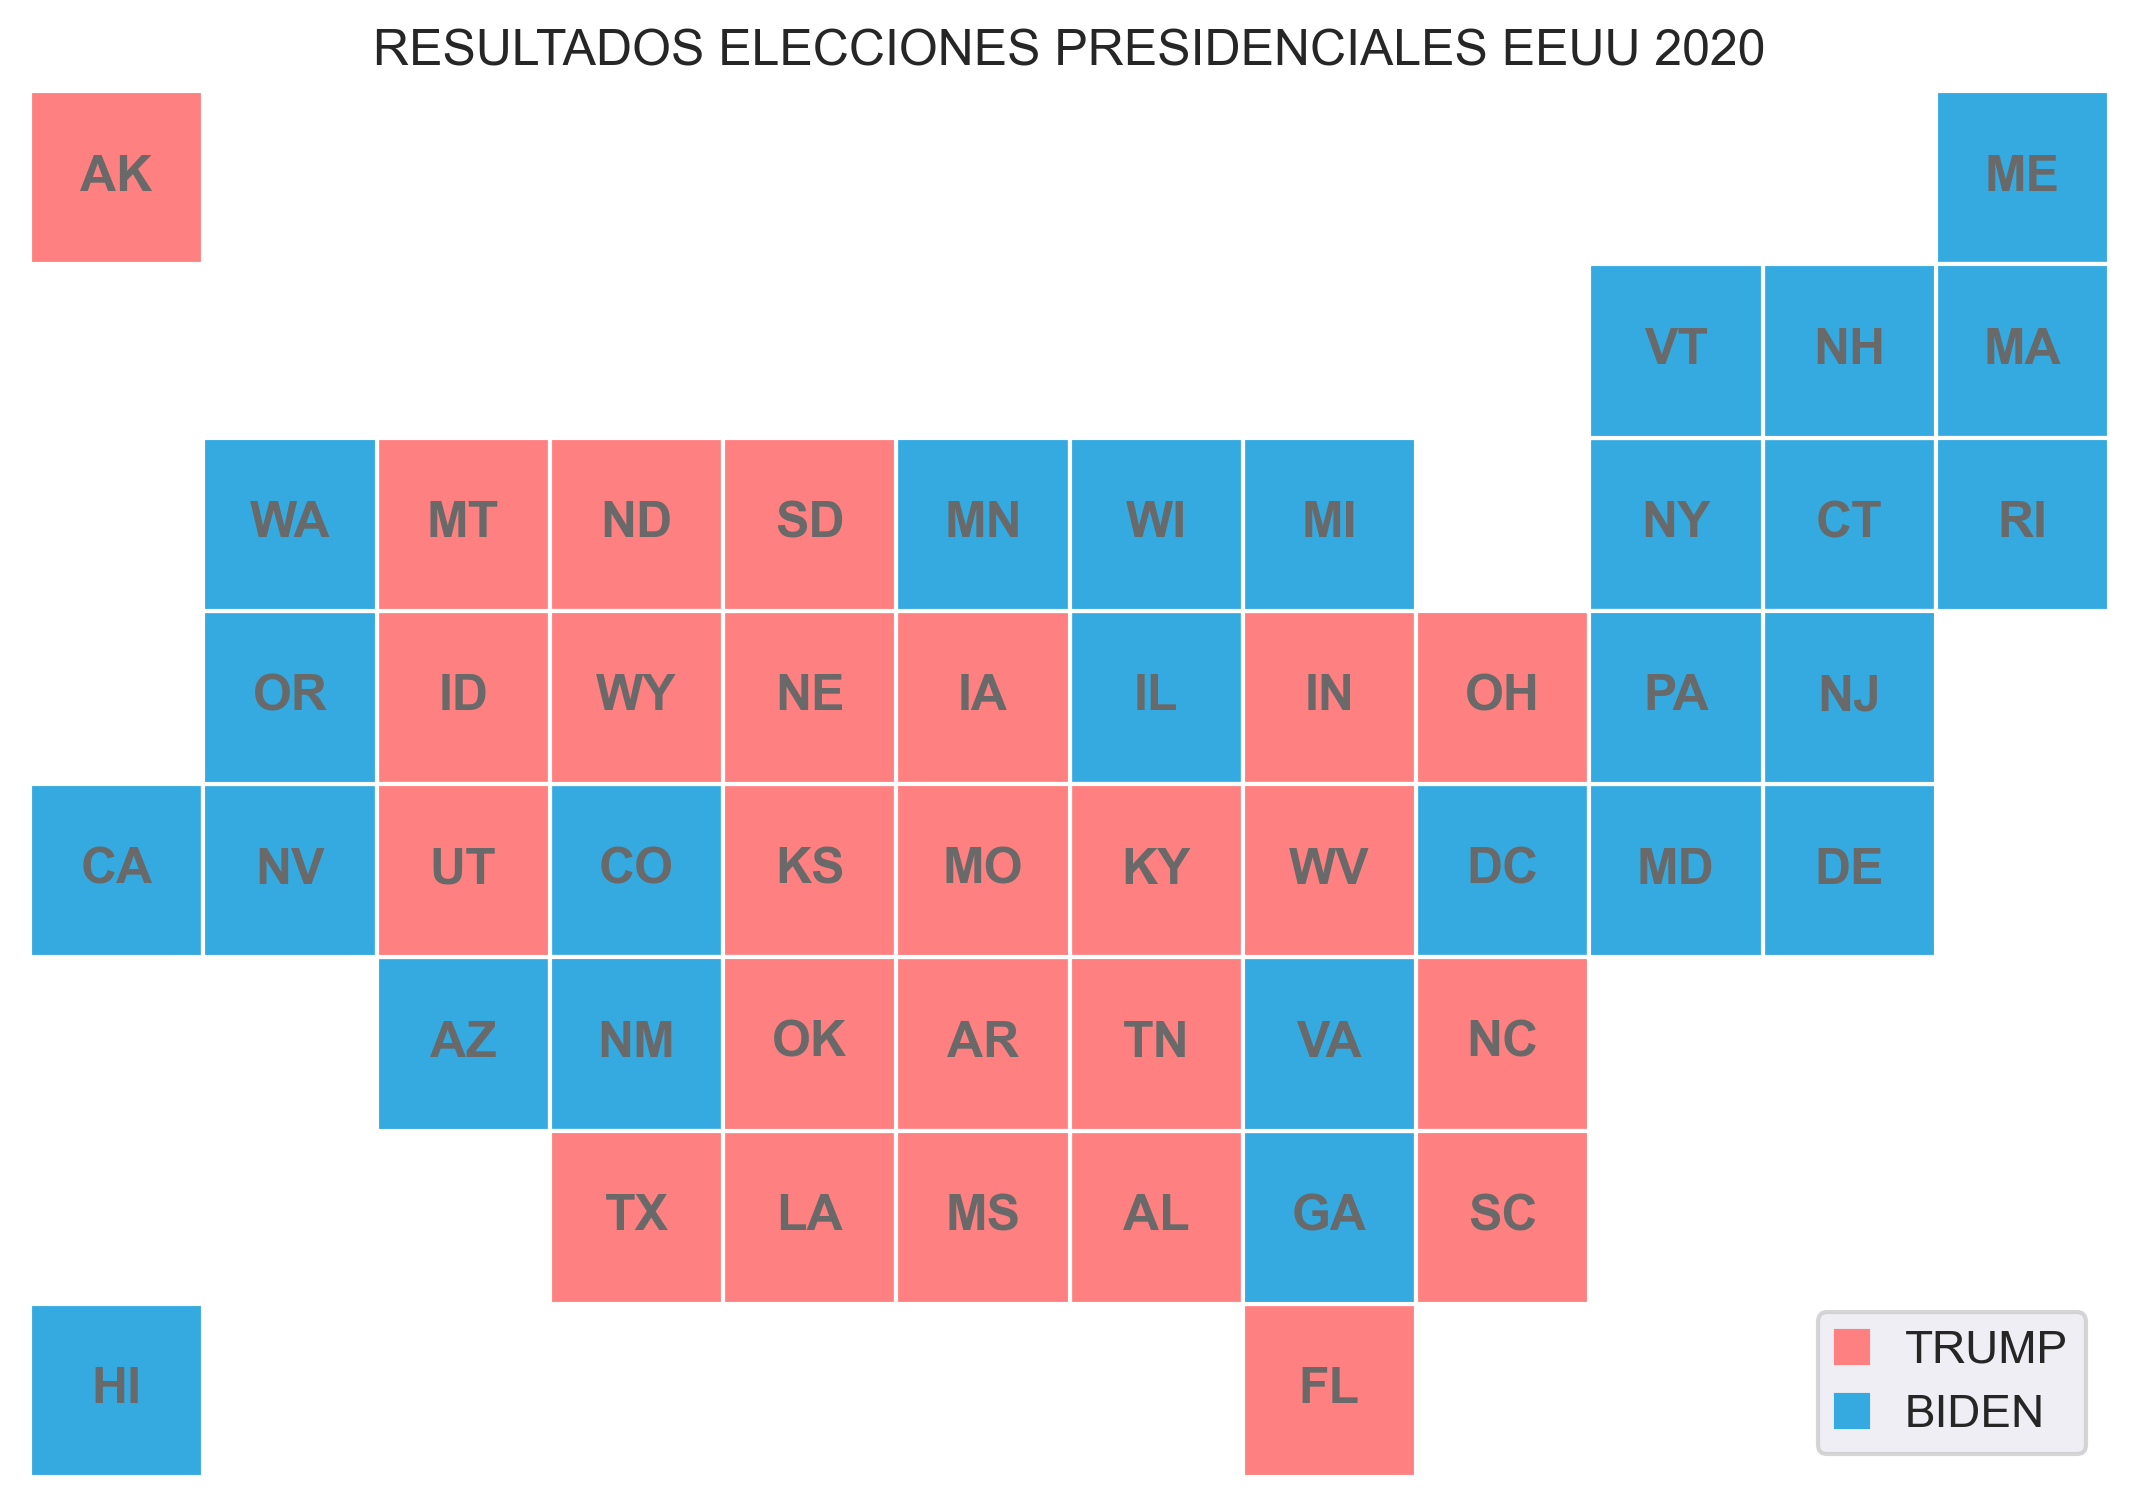

In [7]:
# Generamos Tile Grid Map
colors = { 'TRUMP': '#ff8080', 'BIDEN': '#34aae0' }
red = patches.Patch(color=colors['TRUMP'], label='TRUMP')
blue = patches.Patch(color=colors['BIDEN'], label='BIDEN')

fig, axs = plt.subplots(1, figsize=(12, 6), dpi=300)
plt.xlim(0, 12)
plt.ylim(0, 8)
plt.axis('off')
axs.set_aspect('equal')

for _, state in df.iterrows():
    box = patches.Rectangle((state.column, state.row), 1, 1, linewidth=1,
                            edgecolor='white', facecolor=colors[state.cand_simp])
    plt.text(state.column + 0.5, state.row + 0.5, state.code, horizontalalignment='center',
            verticalalignment='center', color='dimgrey', weight='bold')
    axs.add_patch(box)
    
plt.title('RESULTADOS ELECCIONES PRESIDENCIALES EEUU 2020')
plt.legend(handles=[red,blue], handlelength=0.7)
fig.savefig('images/Tile_Grid_Map.png', bbox_inches='tight')
plt.show()